# Introduction

This notebook iterates through multilinear regression models, using the data from `cleaned_kc.csv`. Models are compared to the baseline R-squared value from the `eda_and_cleaning.ipynb` notebook, which was **0.692.**

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime  as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

In [2]:
df = pd.read_csv('../data/cleaned_kc.csv')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,3.410784,7.662792,285.904342,1971.092997,0.034547,98077.87437,47.560197,-122.213784,1988.384080,12775.718161,184.792717
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.650035,1.171971,440.008202,29.387141,0.182634,53.47748,0.138589,0.140791,685.537057,27345.621867,94.527216
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,2.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000,111.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000,181.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,4.000000,8.000000,550.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000,262.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,4820.000000,2015.000000,1.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,365.000000


In [5]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,286
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1.0,98125,47.7210,-122.319,1690,7639,343
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,56
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,343
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,49


# Model 1: Baseline Model

The baseline model is reprinted below for reference:

In [6]:
price = df.price
indep = df.drop('price', axis = 1)

model = sm.OLS(price, indep).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2831.
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:47:43   Log-Likelihood:            -2.9228e+05
No. Observations:               21420   AIC:                         5.846e+05
Df Residuals:                   21402   BIC:                         5.847e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -1.072e-06   4.91e-07     -2.182      0.029   -2.04e-06   -1.09e-07
bedrooms      -4.005e+04   1929.391    -20.757      0.000   -4.38e+04   -3.63e+04
bathrooms      4.342e+04   3320.701     13.076      0.000    3.69e+04    4.99e+04
sqft_living     178.3476      3.718     47.963      0.000     171.059     185.636
sqft_lot          0.1617      0.049      3.324      0.001       0.066       0.257
floors         1.129e+04   3585.706      3.148      0.002    4258.823    1.83e+04
waterfront     7.798e+05   1.72e+04     45.314      0.000    7.46e+05    8.14e+05
condition      2.828e+04   2369.107     11.938      0.000    2.36e+04    3.29e+04
grade           1.02e+05   2184.397     46.691      0.000    9.77e+04    1.06e+05
sqft_basement    -9.8393      4.292     -2.293      0.022     -18.252      -1.427
yr_built      -2792.8368     68.036    -41.050      0.000   -2926.192   -2659.482
renovated        5.3e+04   8064.967      6.572      0.000    3.72e+04    6.88e+04
zipcode        -516.6543     18.190    -28.403      0.000    -552.309    -481.000
lat            5.762e+05   1.09e+04     52.931      0.000    5.55e+05    5.98e+05
long          -2.294e+05   1.33e+04    -17.215      0.000   -2.56e+05   -2.03e+05
sqft_living15    34.9729      3.414     10.243      0.000      28.280      41.665
sqft_lot15       -0.3849      0.075     -5.158      0.000      -0.531      -0.239
day_of_year    -105.4953     14.773     -7.141      0.000    -134.451     -76.540
==============================================================================
Omnibus:                    18079.317   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1726653.156
Skew:                           3.541   Prob(JB):                         0.00
Kurtosis:                      46.410   Cond. No.                     6.68e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 2: Mean Normalization of Continuous Variables

## Continuous Variables

It's time to separate categorical and continuous values. Most are fairly obvious in this dataset. As a general rule, "If the variable's numeric value makes sense intuitively, or is not 0-1 choice, it's a continuous variable." A value of 50,000 `price`, 3 `bathrooms`, or 320 `day_of_year` all make sense without explanation.

In [7]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'day_of_year'],
      dtype='object')

Naturally, then, these are the continuous variables:

In [8]:
cont = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'day_of_year']

Next, let's look at the distributions of these continuous variables and determine which need to be normalized and/or log transformed:

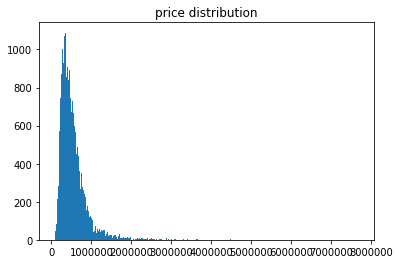

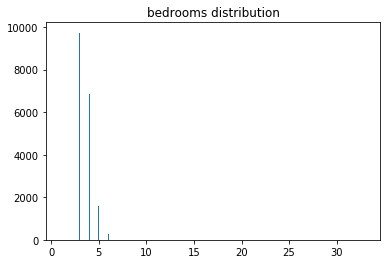

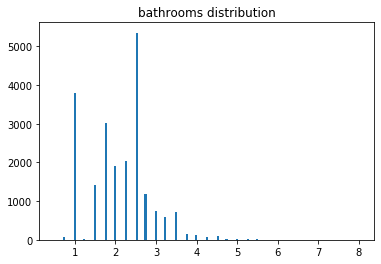

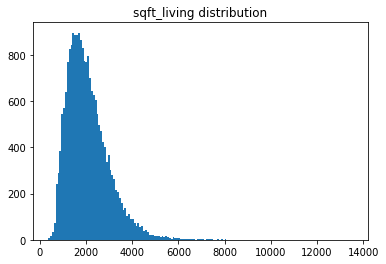

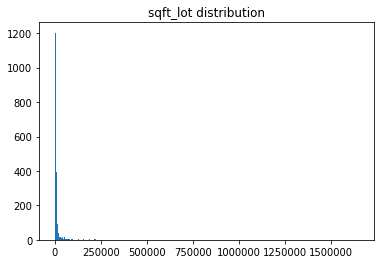

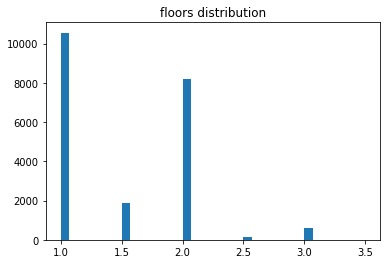

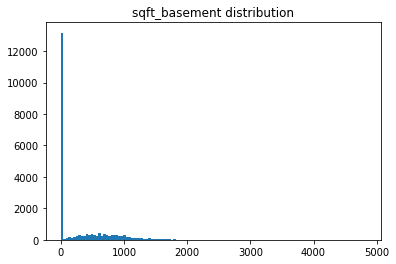

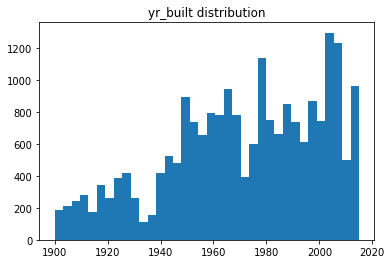

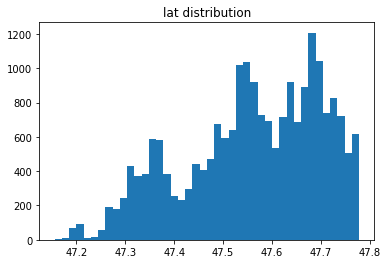

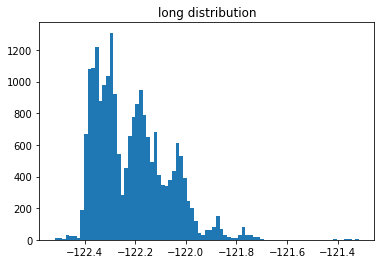

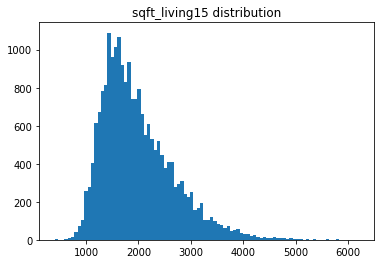

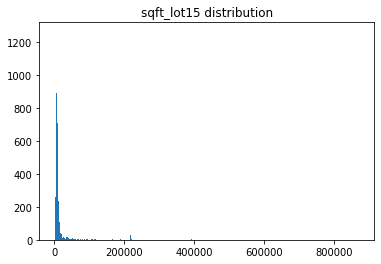

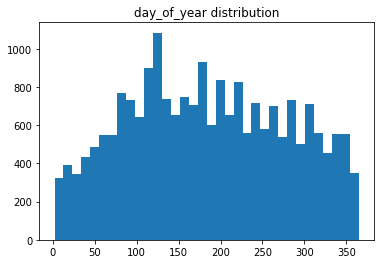

In [9]:
for col in df[cont].columns:
    plt.hist(df[col], bins='auto')
    plt.title(f'{col} distribution')
    plt.show()

A few observations:
1. Some of these columns have extreme outlier-related skews, such as `price` and `sqft_basement`.
1. The column `sqft_basement`, while continuous, should be changed to a binary column because of how many zero values there are. It makes more sense to present this as "Has or doesn't have basement" as opposed to "Size of basement, with zero being a possible size."
1. Only 3 of these columns (`price`, `sqft_living15`, and `sqft_living`) have distributions that are close to normal.

The `sqft_basement` column will be changed, and the remaining columns now will be normalized:

In [10]:
# Make a copy to do changes on
df2 = df.copy()

In [11]:
df2.loc[(df2.sqft_basement > 0), 'sqft_basement'] = 1
df2.rename({'sqft_basement' : 'has_basement'}, axis=1, inplace=True)
df2.has_basement.unique()

array([0., 1.])

In [12]:
cont.remove("sqft_basement")

In [13]:
already_norm = ["price", "sqft_living15", "sqft_living"]
cont_to_norm = [x for x in cont if x not in already_norm]

In [14]:
for col in df2[cont_to_norm].columns:
    df2[col] = (df2[col] - np.mean(df2[col])) / (max(df2[col]) - min(df2[col]))
    df2.rename({f'{col}' : f'{col}_norm'}, axis=1, inplace=True)

In [15]:
df2.describe()

,id,price,bedrooms_norm,bathrooms_norm,sqft_living,sqft_lot_norm,floors_norm,waterfront,condition,grade,has_basement,yr_built_norm,renovated,zipcode,lat_norm,long_norm,sqft_living15,sqft_lot15_norm,day_of_year_norm
count,2.142000e+04,2.142000e+04,2.142000e+04,2.142000e+04,21420.000000,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.00000,2.142000e+04,2.142000e+04,21420.000000,2.142000e+04,2.142000e+04
mean,4.580940e+09,5.407393e+05,-1.015890e-18,2.587411e-17,2083.132633,2.073246e-19,-1.326877e-17,0.006816,3.410784,7.662792,0.385201,-6.793611e-16,0.034547,98077.87437,3.162446e-15,-2.773837e-15,1988.384080,-6.634386e-19,2.172761e-17
std,2.876761e+09,3.679311e+05,2.891889e-02,1.024960e-01,918.808412,2.515739e-02,2.160324e-01,0.082280,0.650035,1.171971,0.486654,2.555404e-01,0.182634,53.47748,2.229199e-01,1.169357e-01,685.537057,3.141193e-02,2.604056e-01
min,1.000102e+06,7.800000e+04,-7.418592e-02,-2.157905e-01,370.000000,-8.848857e-03,-1.983940e-01,0.000000,1.000000,3.000000,0.000000,-6.182000e-01,0.000000,98001.00000,-6.503093e-01,-2.535019e-01,399.000000,-1.392767e-02,-5.035612e-01
25%,2.123537e+09,3.225000e+05,-1.168592e-02,-4.912387e-02,1430.000000,-6.110855e-03,-1.983940e-01,0.000000,3.000000,7.000000,0.000000,-1.660261e-01,0.000000,98033.00000,-1.431515e-01,-9.486407e-02,1490.000000,-8.817101e-03,-2.032857e-01
50%,3.904921e+09,4.500000e+05,-1.168592e-02,1.754279e-02,1920.000000,-4.551648e-03,1.605976e-03,0.000000,3.000000,7.000000,0.000000,3.397394e-02,0.000000,98065.00000,1.914541e-02,-1.346872e-02,1840.000000,-5.922376e-03,-1.044826e-02
75%,7.308900e+09,6.450000e+05,1.956408e-02,5.087613e-02,2550.000000,-2.688050e-03,2.016060e-01,0.000000,4.000000,8.000000,1.000000,2.252783e-01,0.000000,98117.00000,1.896457e-01,7.374058e-02,2370.000000,-3.089393e-03,2.126922e-01
max,9.900000e+09,7.700000e+06,9.258141e-01,7.842095e-01,13540.000000,9.911511e-01,8.016060e-01,1.000000,5.000000,13.000000,1.000000,3.818000e-01,1.000000,98199.00000,3.496907e-01,7.464981e-01,6210.000000,9.860723e-01,4.964388e-01


## Model 2A

In [16]:
price = df2.price
indep = df2.drop('price', axis = 1)

model2 = sm.OLS(price, indep).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     2790.
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:47:58   Log-Likelihood:            -2.9239e+05
No. Observations:               21420   AIC:                         5.848e+05
Df Residuals:                   21402   BIC:                         5.850e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
id               -1.085e-06   4.94e-07     -2.196      0.028   -2.05e-06   -1.17e-07
bedrooms_norm     -1.23e+06   6.21e+04    -19.810      0.000   -1.35e+06   -1.11e+06
bathrooms_norm    3.415e+05   2.52e+04     13.535      0.000    2.92e+05    3.91e+05
sqft_living        175.1375      3.473     50.424      0.000     168.329     181.945
sqft_lot_norm     2.625e+05   8.08e+04      3.250      0.001    1.04e+05    4.21e+05
floors_norm        1.29e+04   8800.630      1.466      0.143   -4348.055    3.02e+04
waterfront        7.733e+05   1.73e+04     44.716      0.000    7.39e+05    8.07e+05
condition         3.208e+04   2387.156     13.437      0.000    2.74e+04    3.68e+04
grade             1.033e+05   2187.978     47.217      0.000     9.9e+04    1.08e+05
has_basement     -1.422e+04   3419.979     -4.158      0.000   -2.09e+04   -7518.111
yr_built_norm    -3.045e+05   8363.170    -36.405      0.000   -3.21e+05   -2.88e+05
renovated         5.459e+04   8117.486      6.725      0.000    3.87e+04    7.05e+04
zipcode             -8.1545      0.161    -50.707      0.000      -8.470      -7.839
lat_norm          3.377e+05   6653.173     50.754      0.000    3.25e+05    3.51e+05
long_norm        -1.772e+05   1.47e+04    -12.060      0.000   -2.06e+05   -1.48e+05
sqft_living15       39.1865      3.458     11.332      0.000      32.409      45.964
sqft_lot15_norm  -3.449e+05   6.53e+04     -5.280      0.000   -4.73e+05   -2.17e+05
day_of_year_norm -3.753e+04   5389.617     -6.964      0.000   -4.81e+04    -2.7e+04
==============================================================================
Omnibus:                    18152.084   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1722386.494
Skew:                           3.568   Prob(JB):                         0.00
Kurtosis:                      46.347   Cond. No.                     3.69e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In an unenjoyable turn of events, these mean normalizations actually reduced the R-squared value from **0.692** to **0.689.** This isn't a huge loss, and I suspect it may have to do with outliers in the data imprinting on our mean-normalization formula. Let's try and remove the outliers in a few columns, re-normalize the data, and run the model again.

In [17]:
y = df2['price']
X = df2.drop(['price'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 40904000903.90168
Test Mean Squarred Error: 44763342574.21224


In [18]:
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 202247.3755179574
Test Root Mean Squarred Error: 211573.49213503153


The RMSE on this model is *not* great. **$200,000+** give or take on a price estimate could be pretty severely out of line unless we're looking at million dollar homes, and even still. Hopefully removing outliers handles this. Below, we have a plot of recorded price and estimate price (on X and Y respectively), which will be reproduced for each subsequent plot. You'll notice first that the outlier prices are so, extremely far away form the line that would indicate a 1-to-1 match of estimation and actual price. Let's oust them!

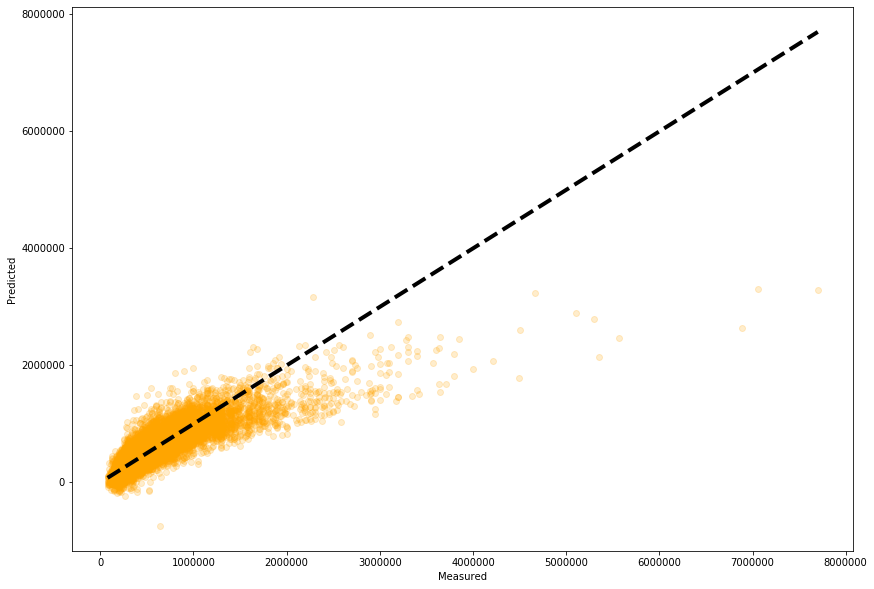

In [19]:
predicted = cross_val_predict(linreg, X, y, cv=10)

plt.figure(figsize = (14,10))
plt.scatter(y, predicted, alpha=0.2, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show();

## Removing Outliers

First, we'll make a copy of the dataframe, then iterate through certain columns to remove their outliers. These columns, as illustrated in the histograms two sections prior, will be `price`, `bedrooms`, `sqft_lot`, `sqft_living`, `sqft_basement`, and `sqft_lot15`.

In [20]:
df3 = df.copy()

In [21]:
out_to_drop = ['price', 'bedrooms', 'sqft_lot', 'sqft_living', 'sqft_basement', 'sqft_lot15']

In [22]:
for i in out_to_drop:
    df3 = df3[np.abs(df[i] - df[i].mean()) <= (3*df[i].std())]

In [23]:
print("We just dropped", len(df) - len(df3), "rows!\nThat's",
      (len(df)-len(df3))/len(df)*100, "% of the original data.")

We just dropped 1143 rows!
That's 5.336134453781512 % of the original data.


Now that those are dropped, we can do the same as in the section above:

In [24]:
# Switch basement to binary column
df3.loc[(df3.sqft_basement > 0), 'sqft_basement'] = 1
df3.rename({'sqft_basement' : 'has_basement'}, axis=1, inplace=True)

# Normalize chosen columns
for col in df3[cont_to_norm].columns:
    df3[col] = (df3[col] - np.mean(df3[col])) / (max(df3[col]) - min(df3[col]))
    df3.rename({f'{col}' : f'{col}_norm'}, axis=1, inplace=True)

## Model 2B

In [25]:
price = df3.price
indep = df3.drop('price', axis = 1)

model3 = sm.OLS(price, indep).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2695.
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:47:59   Log-Likelihood:            -2.6898e+05
No. Observations:               20277   AIC:                         5.380e+05
Df Residuals:                   20259   BIC:                         5.381e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
id               -7.765e-07   3.45e-07     -2.248      0.025   -1.45e-06   -9.94e-08
bedrooms_norm    -8.719e+04   7464.048    -11.682      0.000   -1.02e+05   -7.26e+04
bathrooms_norm    1.386e+05   1.16e+04     11.996      0.000    1.16e+05    1.61e+05
sqft_living         94.1796      2.800     33.632      0.000      88.691      99.668
sqft_lot_norm     5.108e+04   1.95e+04      2.616      0.009    1.28e+04    8.93e+04
floors_norm        7.42e+04   6352.366     11.681      0.000    6.18e+04    8.67e+04
waterfront        3.548e+05   1.64e+04     21.689      0.000    3.23e+05    3.87e+05
condition         3.176e+04   1673.628     18.977      0.000    2.85e+04     3.5e+04
grade             9.186e+04   1568.233     58.578      0.000    8.88e+04    9.49e+04
has_basement      1.243e+04   2421.438      5.134      0.000    7684.450    1.72e+04
yr_built_norm    -2.553e+05   5910.885    -43.184      0.000   -2.67e+05   -2.44e+05
renovated         4.458e+04   5844.803      7.627      0.000    3.31e+04     5.6e+04
zipcode             -6.2719      0.116    -54.186      0.000      -6.499      -6.045
lat_norm          3.305e+05   4646.060     71.143      0.000    3.21e+05     3.4e+05
long_norm        -5.382e+04   1.05e+04     -5.124      0.000   -7.44e+04   -3.32e+04
sqft_living15       61.2000      2.610     23.446      0.000      56.084      66.316
sqft_lot15_norm  -1.356e+05   1.73e+04     -7.843      0.000   -1.69e+05   -1.02e+05
day_of_year_norm -3.245e+04   3769.446     -8.610      0.000   -3.98e+04   -2.51e+04
==============================================================================
Omnibus:                     5131.647   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20351.025
Skew:                           1.211   Prob(JB):                         0.00
Kurtosis:                       7.268   Cond. No.                     1.37e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we can see that this model is actually *quite close* to the baseline model. R-squared is **0.693,** just **0.001** above the baseline. However, the p-values on everything but `sqft_lot_norm` are 0. This is a promising change. The next model will be based on this one.

In [26]:
y = df3['price']
X = df3.drop(['price'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 19223750861.24596
Test Mean Squarred Error: 19780985683.065475


In [27]:
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 138649.74165589333
Test Root Mean Squarred Error: 140644.89213286588


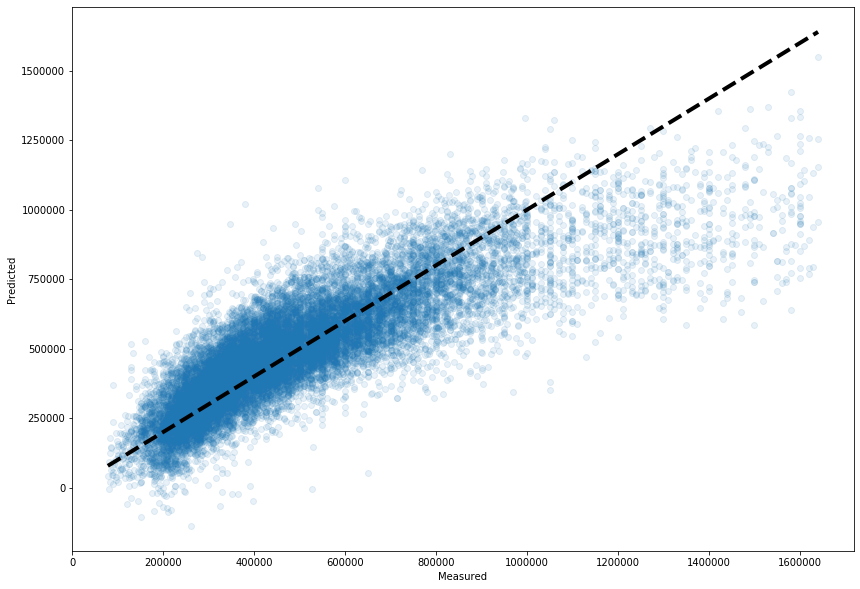

In [28]:
predicted = cross_val_predict(linreg, X, y, cv=10)

plt.figure(figsize = (14,10))
plt.scatter(y, predicted, alpha=0.1)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show();

The RMSE on this model is not great. **~$138,000** is a huge amount of money to mis-estimate the price of a house by. The following models aim to reduce this to a 5-digit-or-less number.

# Model 3: Categorical Variables As Dummies

This model is based on **Model 2B** and investigates the impact of creating dummy variables for the categorical columns.

In [29]:
df4 = df3.copy()

## Categorical Variables

In [30]:
df4.columns

Index(['id', 'price', 'bedrooms_norm', 'bathrooms_norm', 'sqft_living',
       'sqft_lot_norm', 'floors_norm', 'waterfront', 'condition', 'grade',
       'has_basement', 'yr_built_norm', 'renovated', 'zipcode', 'lat_norm',
       'long_norm', 'sqft_living15', 'sqft_lot15_norm', 'day_of_year_norm'],
      dtype='object')

The columns `condition`, and `grade` are fine as-is, and just need dummies. The columns `waterfront`, `has_basement`, and `renovated` have already been handled and made binary. The column `zipcode` will be dropped entirely and replaced with quadrants based on `lat` and `long`. Consequently, the normalized `lat` and `long` columns will also be dropped.

In [31]:
df4["lat"] = df["lat"]
df4["long"] = df["long"]
df4.drop(["lat_norm", "long_norm"], axis=1, inplace=True)

In [32]:
# Sectors by lat and long
df4.loc[(df4['lat'] >= 47.505) & (df4['long'] >= -122.221), "sector_1"] = 1
df4.loc[(df4['lat'] >= 47.505) & (df4['long'] < -122.221), "sector_2"] = 1
df4.loc[(df4['lat'] < 47.505) & (df4['long'] >= -122.221), "sector_3"] = 1
df4.loc[(df4['lat'] < 47.505) & (df4['long'] < -122.221), "sector_4"] = 1

In [33]:
# Fill sector NaN's with zeros
for sector in ['sector_1', 'sector_2', 'sector_3', 'sector_4']:
    df4[sector] = df4[sector].fillna(0)

In [34]:
# Drop now-useless columns, including sector_1 as in dummies-drop-first style
df4.drop(["zipcode", "lat", "long", "sector_1"], axis=1, inplace=True)

In [35]:
# Condition and grade dummies
grd_dummies = pd.get_dummies(df4.grade, prefix="grd", drop_first=True)
df4.drop('grade', axis=1, inplace=True)

cond_dummies = pd.get_dummies(df4.condition, prefix="cond", drop_first=True)
df4.drop('condition', axis=1, inplace=True)

df4 = pd.concat([df4, grd_dummies, cond_dummies], axis=1)
df4.head()

,id,price,bedrooms_norm,bathrooms_norm,sqft_living,sqft_lot_norm,floors_norm,waterfront,has_basement,yr_built_norm,...,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,cond_2,cond_3,cond_4,cond_5
0,7129300520,221900.0,-0.066805,-0.224706,1180,-0.033242,-0.195285,0.0,0.0,-0.136641,...,1,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,-0.066805,0.038452,2570,-0.021596,0.204715,0.0,1.0,-0.171424,...,1,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,-0.266805,-0.224706,770,-0.001419,-0.195285,0.0,0.0,-0.327945,...,0,0,0,0,0,0,0,1,0,0
3,2487200875,604000.0,0.133195,0.196346,1960,-0.037997,-0.195285,0.0,1.0,-0.049684,...,1,0,0,0,0,0,0,0,0,1
4,1954400510,510000.0,-0.066805,-0.014180,1680,-0.015465,-0.195285,0.0,0.0,0.141620,...,0,1,0,0,0,0,0,1,0,0


## Model 3

In [36]:
price = df4.price
indep = df4.drop('price', axis = 1)

model4 = sm.OLS(price, indep).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1871.
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:48:00   Log-Likelihood:            -2.6801e+05
No. Observations:               20277   AIC:                         5.361e+05
Df Residuals:                   20248   BIC:                         5.363e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
id               -1.361e-06   3.29e-07     -4.136      0.000   -2.01e-06   -7.16e-07
bedrooms_norm    -4.761e+04   7257.781     -6.560      0.000   -6.18e+04   -3.34e+04
bathrooms_norm     1.34e+05   1.11e+04     12.070      0.000    1.12e+05    1.56e+05
sqft_living         92.3002      2.709     34.077      0.000      86.991      97.609
sqft_lot_norm     7.642e+04   1.87e+04      4.096      0.000    3.98e+04    1.13e+05
floors_norm       4.543e+04   6271.348      7.244      0.000    3.31e+04    5.77e+04
waterfront        3.855e+05   1.56e+04     24.646      0.000    3.55e+05    4.16e+05
has_basement      1.108e+04   2354.541      4.706      0.000    6464.947    1.57e+04
yr_built_norm    -2.089e+05   5931.022    -35.222      0.000   -2.21e+05   -1.97e+05
renovated         5.064e+04   5598.530      9.045      0.000    3.97e+04    6.16e+04
sqft_living15       49.2384      2.531     19.456      0.000      44.278      54.199
sqft_lot15_norm  -9.701e+04   1.65e+04     -5.892      0.000   -1.29e+05   -6.47e+04
day_of_year_norm -3.184e+04   3596.265     -8.854      0.000   -3.89e+04   -2.48e+04
sector_2          1.609e+04   2874.588      5.596      0.000    1.05e+04    2.17e+04
sector_3         -1.738e+05   2916.843    -59.598      0.000    -1.8e+05   -1.68e+05
sector_4          -1.88e+05   3316.785    -56.673      0.000   -1.94e+05   -1.81e+05
grd_4             6.391e+04    3.6e+04      1.777      0.076   -6593.648    1.34e+05
grd_5              6.28e+04   2.67e+04      2.355      0.019    1.05e+04    1.15e+05
grd_6             8.124e+04   2.61e+04      3.114      0.002    3.01e+04    1.32e+05
grd_7             1.397e+05   2.61e+04      5.354      0.000    8.86e+04    1.91e+05
grd_8             2.157e+05   2.63e+04      8.205      0.000    1.64e+05    2.67e+05
grd_9             3.341e+05   2.67e+04     12.508      0.000    2.82e+05    3.86e+05
grd_10            4.347e+05   2.73e+04     15.948      0.000    3.81e+05    4.88e+05
grd_11            5.309e+05   2.88e+04     18.411      0.000    4.74e+05    5.87e+05
grd_12            7.262e+05   4.03e+04     18.023      0.000    6.47e+05    8.05e+05
cond_2            3.666e+04   2.75e+04      1.331      0.183   -1.73e+04    9.06e+04
cond_3            6.004e+04   2.54e+04      2.363      0.018    1.02e+04     1.1e+05
cond_4             9.48e+04   2.54e+04      3.729      0.000     4.5e+04    1.45e+05
cond_5            1.251e+05   2.56e+04      4.895      0.000     7.5e+04    1.75e+05
==============================================================================
Omnibus:                     5429.578   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23933.162
Skew:                           1.249   Prob(JB):                         0.00
Kurtosis:                       7.700   Cond. N

This model shows a marked increase in R-squared value, up from **0.693** to **0.721.** Its main drawback is the multitude of dummy variables as predictors.

In [37]:
y = df4['price']
X = df4.drop(['price', 'id'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 17567781382.404324
Test Mean Squarred Error: 18417860800.425793


In [38]:
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 138649.74165589333
Test Root Mean Squarred Error: 135712.41947745899


RMSE has barely changed since the last model. For the following model, we're going to try and just use the strongest predictors and nothing else.

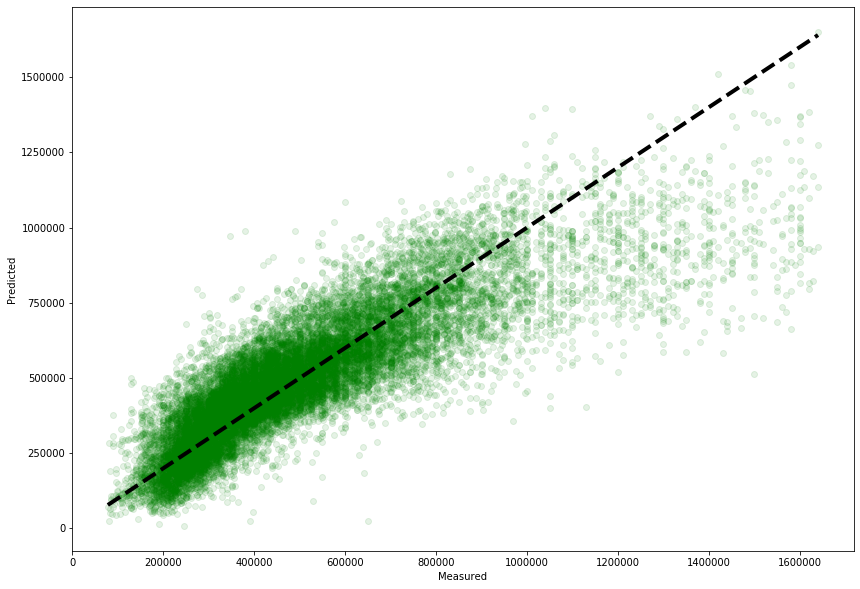

In [39]:
predicted = cross_val_predict(linreg, X, y, cv=10)

plt.figure(figsize = (14,10))
plt.scatter(y, predicted, alpha=0.1, c='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show();

# Model 4: Selective Predictors

This model uses predictors with coefficients (from the previous model) having lengths of 6 or greater.

## Model 4

In [40]:
indep = ['bathrooms_norm', 'waterfront', 'yr_built_norm', 'sector_3', 'sector_4',
         'grd_7', 'grd_8', 'grd_9', 'grd_10', 'grd_11', 'grd_12', 'cond_5']

f = 'price~' + '+'.join(indep)

model4 = smf.ols(formula=f, data=df4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     3507.
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:48:01   Log-Likelihood:            -2.6957e+05
No. Observations:               20277   AIC:                         5.392e+05
Df Residuals:                   20264   BIC:                         5.393e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.662e+05   3726.238     98.268      0.000    3.59e+05    3.73e+05
bathrooms_norm  4.313e+05   9340.280     46.176      0.000    4.13e+05     4.5e+05
waterfront      4.008e+05   1.67e+04     23.948      0.000    3.68e+05    4.34e+05
yr_built_norm  -2.877e+05   5171.495    -55.626      0.000   -2.98e+05   -2.78e+05
sector_3       -1.693e+05   2784.028    -60.818      0.000   -1.75e+05   -1.64e+05
sector_4       -1.927e+05   3124.588    -61.657      0.000   -1.99e+05   -1.87e+05
grd_7           9.865e+04   3653.223     27.004      0.000    9.15e+04    1.06e+05
grd_8           2.171e+05   4287.914     50.628      0.000    2.09e+05    2.25e+05
grd_9           4.016e+05   5195.346     77.295      0.000    3.91e+05    4.12e+05
grd_10          5.527e+05   6696.033     82.538      0.000     5.4e+05    5.66e+05
grd_11          7.055e+05   1.11e+04     63.387      0.000    6.84e+05    7.27e+05
grd_12           9.63e+05   3.18e+04     30.284      0.000    9.01e+05    1.03e+06
cond_5          4.369e+04   3913.268     11.164      0.000     3.6e+04    5.14e+04
==============================================================================
Omnibus:                     5172.218   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20692.555
Skew:                           1.218   Prob(JB):                         0.00
Kurtosis:                       7.308   Cond. No.                         36.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interestingly enough, using only predictors with the highest coefficients tanked the model's R-squared value from **0.721** to **0.675.** Let's see if the RMSE did any better despite this. I'm predicting a massive increase in error since we're wrangling the larger coefficients now, and almost all are positive.

In [41]:
y = df4['price']
X = df4[indep]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 20553061192.44135
Test Mean Squarred Error: 21050631915.530254


In [42]:
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 138649.74165589333
Test Root Mean Squarred Error: 145088.35899385676


Overall, not a terrible change. Test data did noticeably worse when compared to the differences in other models. Either way, this model is being scrapped and **model 3** will be used going forward to base new models on.

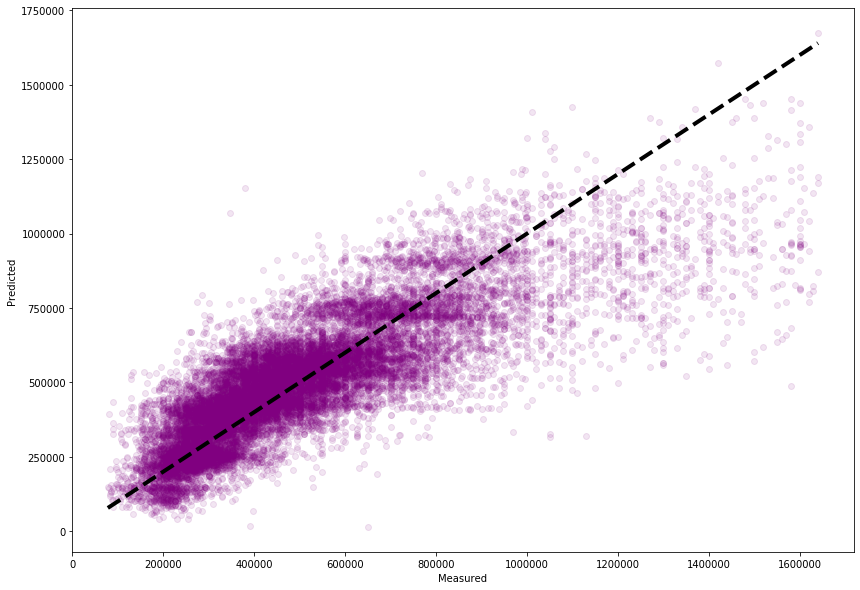

In [43]:
predicted = cross_val_predict(linreg, X, y, cv=10)

plt.figure(figsize = (14,10))
plt.scatter(y, predicted, alpha=0.1, c='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show();

# Model 5: Only P-Values Under 0.05

This model uses only predictors that displayed a p-value of 0.05 or less in model 3.

## Model 5

In [44]:
indep = df4.drop(['price', 'id', 'grd_4', 'grd_5', 'cond_2', "cond_3"], axis=1).columns

f = 'price~' + '+'.join(indep)

model4 = smf.ols(formula=f, data=df4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     2179.
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:48:02   Log-Likelihood:            -2.6803e+05
No. Observations:               20277   AIC:                         5.361e+05
Df Residuals:                   20252   BIC:                         5.363e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.143e+05   9988.834     11.447      0.000    9.48e+04    1.34e+05
bedrooms_norm    -4.713e+04   7260.915     -6.492      0.000   -6.14e+04   -3.29e+04
bathrooms_norm    1.342e+05   1.11e+04     12.086      0.000    1.12e+05    1.56e+05
sqft_living         92.2406      2.709     34.044      0.000      86.930      97.551
sqft_lot_norm     7.807e+04   1.86e+04      4.191      0.000    4.16e+04    1.15e+05
floors_norm       4.588e+04   6273.752      7.313      0.000    3.36e+04    5.82e+04
waterfront        3.841e+05   1.56e+04     24.555      0.000    3.53e+05    4.15e+05
has_basement      1.118e+04   2355.464      4.748      0.000    6566.294    1.58e+04
yr_built_norm    -2.078e+05   5923.450    -35.080      0.000   -2.19e+05   -1.96e+05
renovated         5.129e+04   5599.087      9.161      0.000    4.03e+04    6.23e+04
sqft_living15       48.9246      2.532     19.326      0.000      43.962      53.887
sqft_lot15_norm  -9.314e+04   1.65e+04     -5.660      0.000   -1.25e+05   -6.09e+04
day_of_year_norm  -3.16e+04   3597.918     -8.784      0.000   -3.87e+04   -2.46e+04
sector_2           1.66e+04   2873.807      5.776      0.000     1.1e+04    2.22e+04
sector_3         -1.735e+05   2917.552    -59.457      0.000   -1.79e+05   -1.68e+05
sector_4         -1.879e+05   3317.937    -56.634      0.000   -1.94e+05   -1.81e+05
grd_6             2.014e+04   8995.175      2.239      0.025    2511.548    3.78e+04
grd_7             7.906e+04   8801.801      8.983      0.000    6.18e+04    9.63e+04
grd_8             1.548e+05   9184.760     16.859      0.000    1.37e+05    1.73e+05
grd_9             2.735e+05   9897.207     27.630      0.000    2.54e+05    2.93e+05
grd_10            3.743e+05    1.1e+04     34.125      0.000    3.53e+05    3.96e+05
grd_11             4.71e+05   1.41e+04     33.361      0.000    4.43e+05    4.99e+05
grd_12            6.652e+05   3.13e+04     21.260      0.000    6.04e+05    7.27e+05
cond_4            3.558e+04   2367.158     15.029      0.000    3.09e+04    4.02e+04
cond_5            6.595e+04   3808.295     17.316      0.000    5.85e+04    7.34e+04
==============================================================================
Omnibus:                     5400.700   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23632.897
Skew:                           1.244   Prob(JB):                         0.00
Kurtosis:                       7.667   Cond. No.                     1.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical pr

In [45]:
y = df4['price']
X = df4[indep]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 17694200403.429462
Test Mean Squarred Error: 17961444621.804546


In [46]:
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 138649.74165589333
Test Root Mean Squarred Error: 134020.31421319884


The trained RMSE and R-squared values are literally identical between this **model 5** and the previous **model 3.** Testing RMSE however took a dip, but not a very considerable one. All that being said, this model was *generally* the best from the previous examples. It stands that  this model should be used as the predictor for house prices going forward. It is the final model.

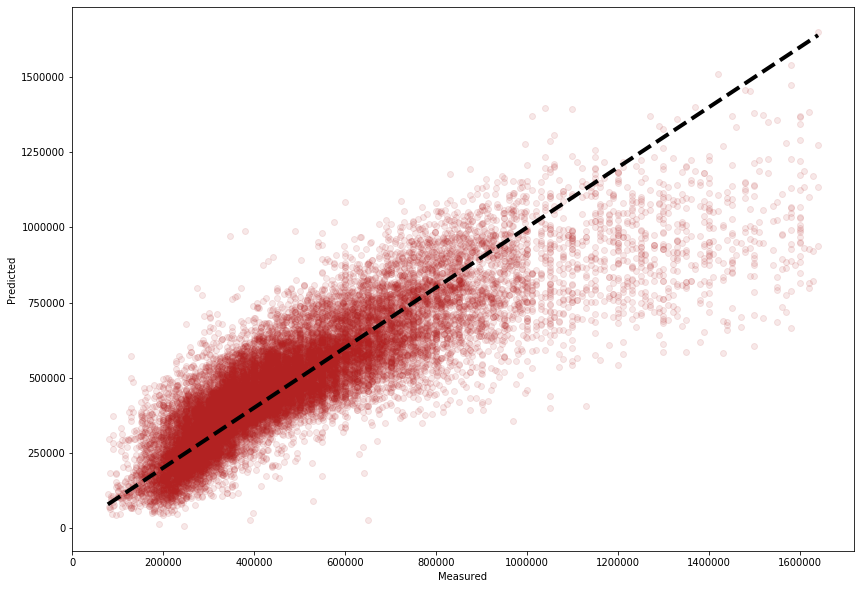

In [47]:
predicted = cross_val_predict(linreg, X, y, cv=10)

plt.figure(figsize = (14,10))
plt.scatter(y, predicted, alpha=0.1, c='firebrick')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show();